In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from  matplotlib.ticker import PercentFormatter

In [137]:
def add_percentage_labels_for_advice(plot, feature, ax,max_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / max_count)
        x = p.get_x() + p.get_width()
        y = p.get_y()
        #print(p)
        #print(f'percentage of {percentage}, (x,y) is {(x,y)}')
        ax.annotate(percentage, (x+50, y+0.2), fontsize=10, color='black')
    

In [39]:
data=pd.read_csv('pre_processed_data.csv')

In [40]:
dfm=data[['ADV_socialmedia','ADV_online_blogs','ADV_other_parents','ADV_books_magazines','ADV_doctors','ADV_teachers']].melt(var_name='advice_from', value_name='response')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

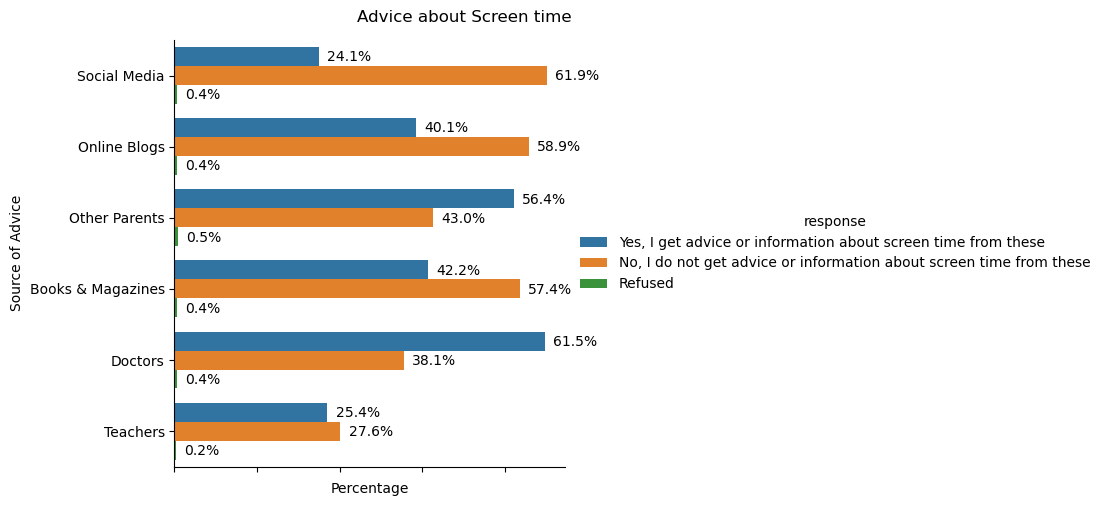

In [138]:
g1=sns.catplot(y='advice_from',hue='response',data=dfm,kind='count',aspect=1.5,height=5)
g1.fig.suptitle('Advice about Screen time',y=1.03)
g1.set(xlabel='Percentage', ylabel='Source of Advice',yticklabels=['Social Media','Online Blogs','Other Parents','Books & Magazines','Doctors','Teachers'],xticklabels='')
#g1.set_xlim(0,100)
#g1.set_yticklabels(labels=)

add_percentage_labels_for_advice(g1, 'advice_from', plt.gca(),len(data)) 

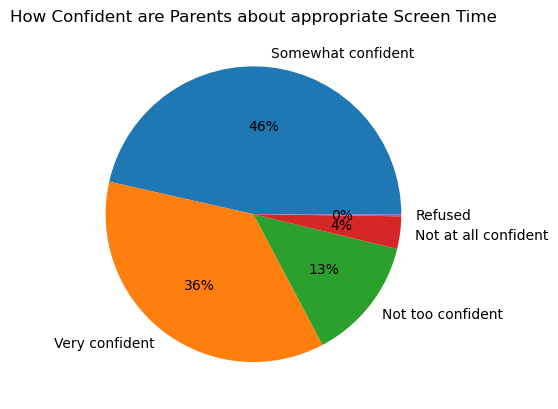

In [230]:
plt.pie(data['Confidence_abt_screen_time'].value_counts().tolist(),labels=data['Confidence_abt_screen_time'].dropna().unique().tolist(),autopct='%1.0f%%')
plt.title('How Confident are Parents about appropriate Screen Time')
plt.show()

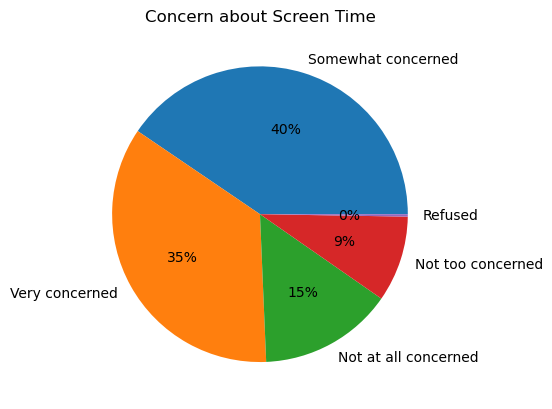

In [229]:
plt.pie(data['CO_screen_time'].value_counts().tolist(),labels=data['CO_screen_time'].dropna().unique().tolist(),autopct='%1.0f%%')
plt.title('Concern about Screen Time')
plt.show()

In [134]:
map_age_to_age_groups={'0':'0-2','1':'0-2','2':'0-2','3':'3-5','4':'3-5','5':'3-5','6':'6-11','7':'6-11','8':'6-11','9':'6-11','10':'6-11','11':'6-11'}
data['Child_age_groups']=data['Child_age_0_11'].map(map_age_to_age_groups)

In [8]:
data.groupby('Child_age_groups')['Uses_youtube'].value_counts()

Child_age_groups  Uses_youtube                                 
0-2               Yes, my child watches videos on YouTube           303
                  No, my child does not watch videos on YouTube     247
                  Refused                                             1
3-5               Yes, my child watches videos on YouTube           532
                  No, my child does not watch videos on YouTube     105
6-11              Yes, my child watches videos on YouTube          1310
                  No, my child does not watch videos on YouTube     130
                  Refused                                             1
Name: Uses_youtube, dtype: int64

In [224]:
def add_percentage_labels_for_youtube(plot, feature, ax,max_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / max_count)
        x = p.get_x()
        y = p.get_height()
        #print(p)
        #print(f'percentage of {percentage}, (x,y) is {(x,y)}')
        if(percentage!='0.0%'):
            ax.annotate(percentage, (x, y+10), fontsize=10, color='black')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

"y_ticks=list(map(int,g2.get_yticks()))\npercent_labels=[i/len(data['Child_age_groups']) for i in y_ticks]\ng2.set_yticklabels(percent_labels)"

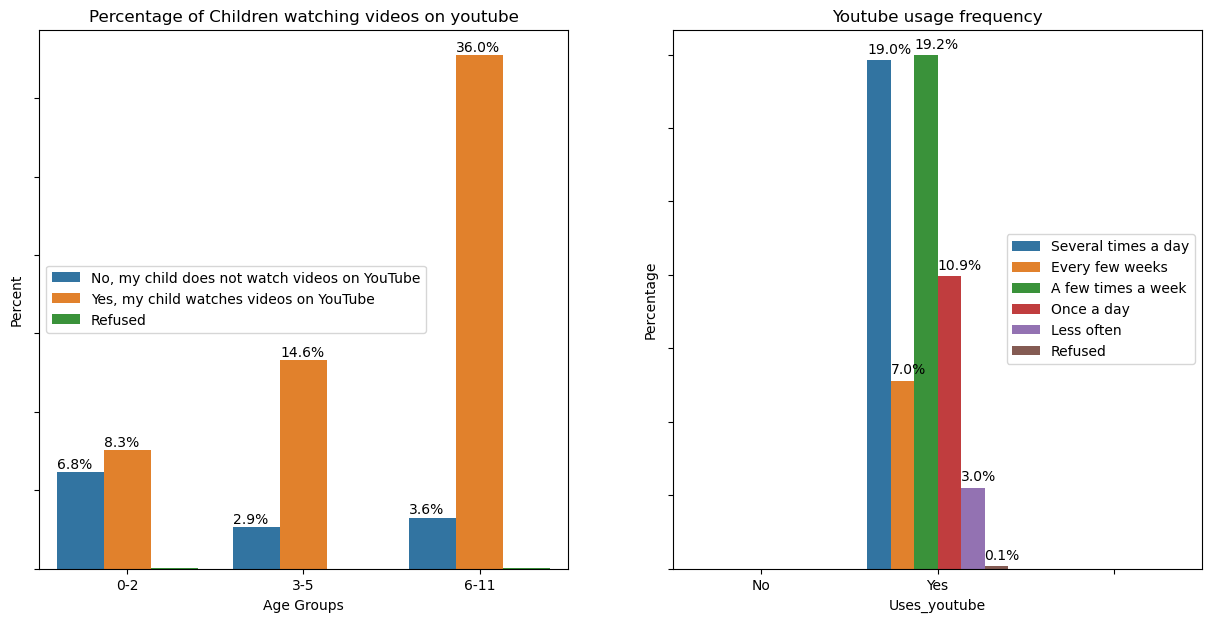

In [226]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(data=data,x='Child_age_groups',hue='Uses_youtube',order=['0-2','3-5','6-11'],ax=ax[0])
ax[0].set(title='Percentage of Children watching videos on youtube',xlabel='Age Groups', ylabel='Percent',yticklabels='')
ax[0].legend(loc='center left')
#add_percentage_labels_for_youtube(ax[0],'Uses_youtube',plt.gca(),len(data))

sns.countplot(x='Uses_youtube',hue='How_often_youtube',ax=ax[1],data=data)
ax[1].set(title='Youtube usage frequency',xticklabels=['No','Yes',''],yticklabels='',ylabel='Percentage')
#ax[1].legend(bbox_to_anchor=(1.02, 0.15),loc='upper left', borderaxespad=-10)
ax[1].legend(loc='center right')
#add_percentage_labels_for_youtube(ax[1],'How_often_youtube',plt.gca(),len(data))
list_of_axes=['Uses_youtube','How_often_youtube']
count=0
for ax in plt.gcf().get_axes():
    add_percentage_labels_for_youtube(ax,list_of_axes[count], ax,len(data))
    count+=1


#ax[1].set_xticklabels(labels=['No','Yes',''])
'''y_ticks=list(map(int,g2.get_yticks()))
percent_labels=[i/len(data['Child_age_groups']) for i in y_ticks]
g2.set_yticklabels(percent_labels)'''

plt.pie(data['Uses_youtube'].value_counts(dropna=False).tolist(),labels=data['Uses_youtube'].unique().tolist(),autopct='%1.0f%%')
plt.title('Proportion of Children watching videos on youtube')

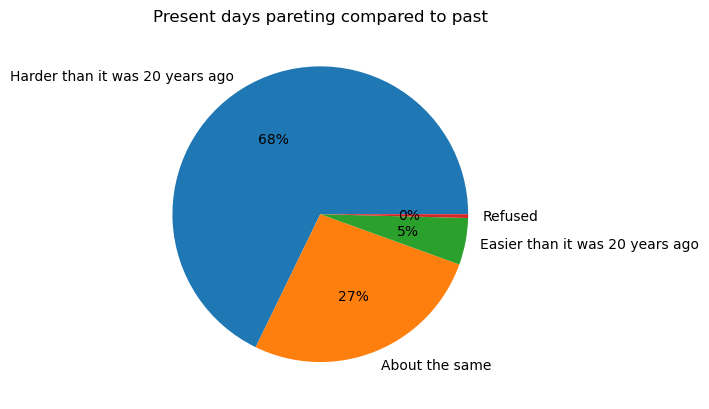

In [231]:
plt.pie(data['How_is_curret_days_parenting'].value_counts().tolist(),labels=data['How_is_curret_days_parenting'].unique().tolist(),autopct='%1.0f%%')
plt.title('Present days pareting compared to past')
plt.show()

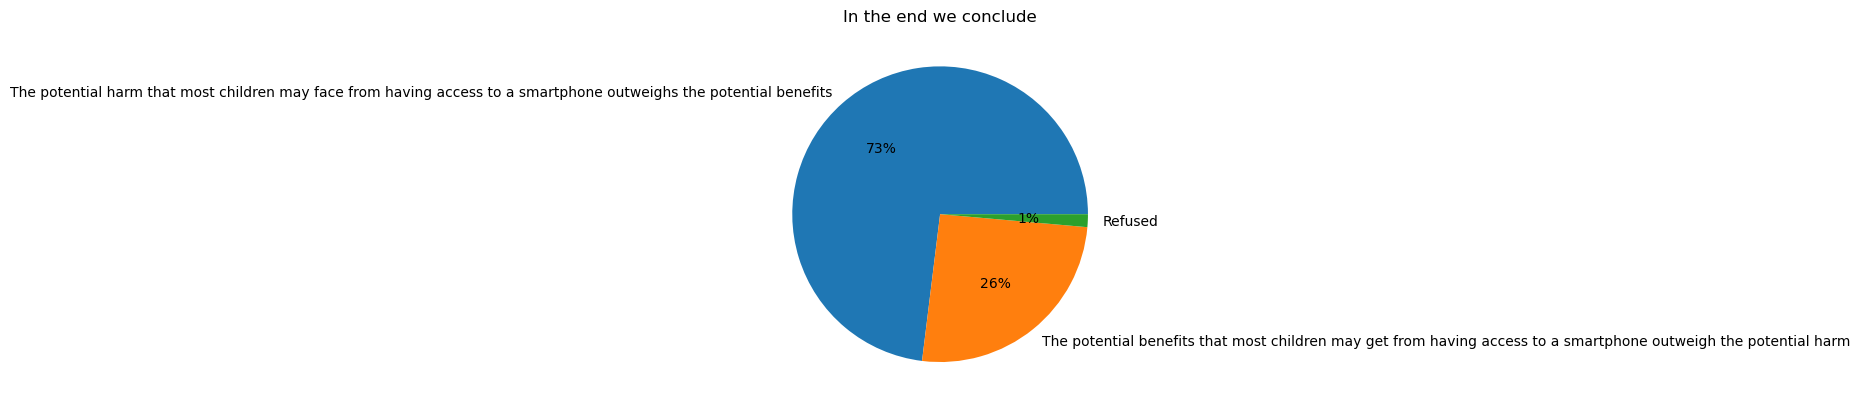

In [11]:
plt.pie(data['Harm_vs_benifits'].value_counts(dropna=False).tolist(),labels=data['Harm_vs_benifits'].unique().tolist(),autopct='%1.0f%%')
plt.title('In the end we conclude')
plt.show()

C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'In the end we conclude')

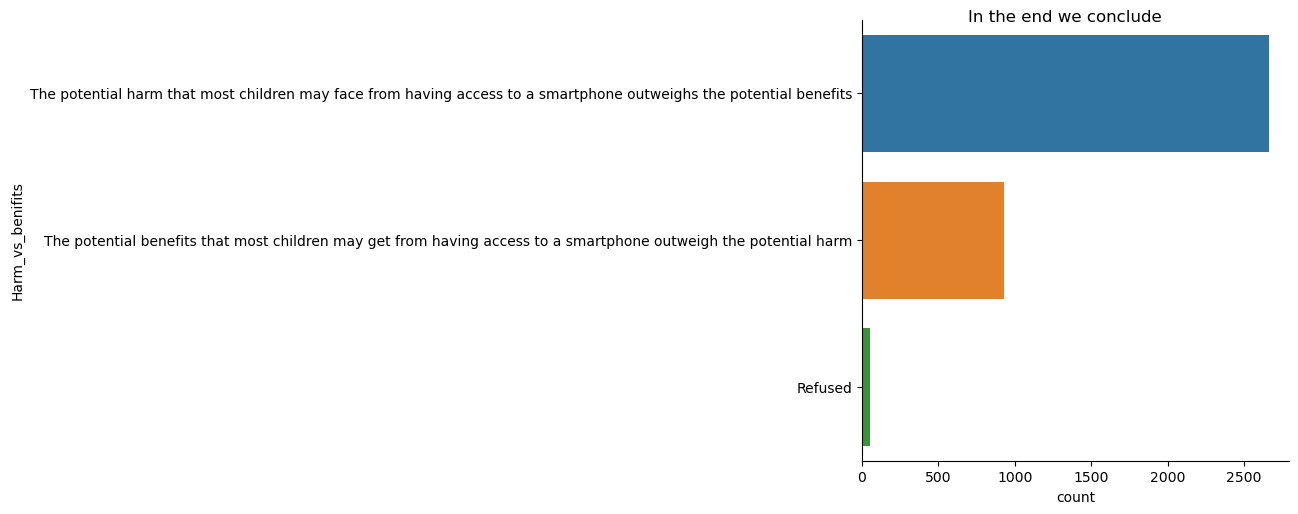

In [12]:
g3=sns.catplot(data=data,y='Harm_vs_benifits',kind='count')
g3.fig.suptitle('In the end we conclude')

In [234]:
dfm1=data[['ACCEPT_own_smartphone','ACCEPT_own_tablet_computer']].melt(var_name='Accept_having _smartphone',value_name='Response')

In [258]:
def add_percentage_labels_for_accept_smartphone(plot, feature, ax,max_count):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / max_count)
        x = p.get_x() + p.get_width()
        y = p.get_y()
        #print(p)
        #print(f'percentage of {percentage}, (x,y) is {(x,y)}')
        ax.annotate(percentage, (x+5, y+0.3), fontsize=10, color='black')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

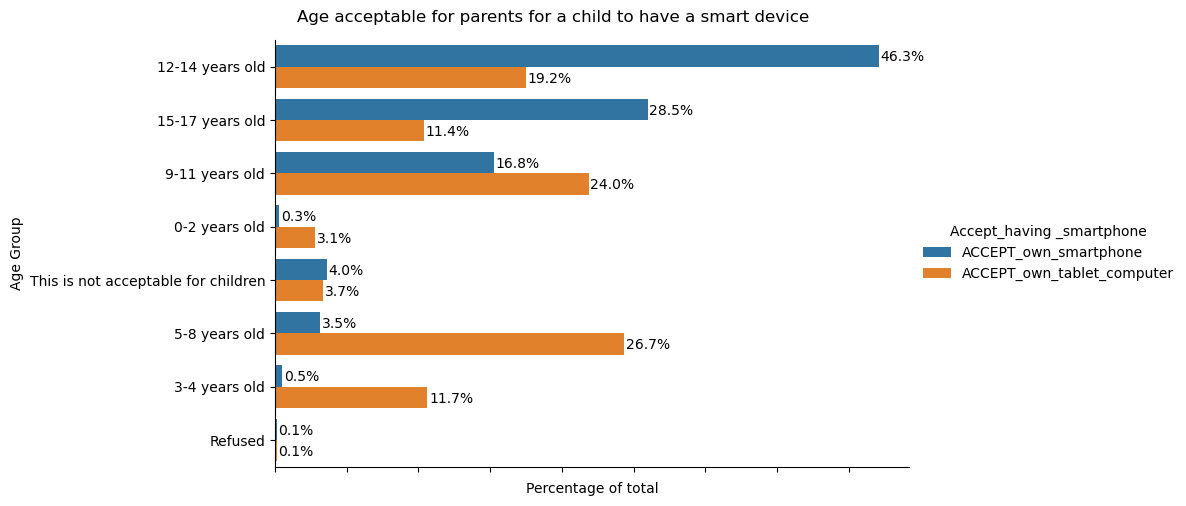

In [259]:
g4=sns.catplot(hue='Accept_having _smartphone',y='Response',data=dfm1,kind='count',height=5,aspect=2)
g4.fig.suptitle('Age acceptable for parents for a child to have a smart device',y=1.03)
g4.set(xticklabels='',xlabel='Percentage of total',ylabel='Age Group')
add_percentage_labels_for_accept_smartphone(g4,'Accept_having _smartphone',plt.gca(),len(data))

In [256]:
dfm3=data[['MNT_websites','MNT_take_away_mobile','MNT_screentime','MNT_call_records','MNT_parental_controls','MNT_socialmedia','MNT_gps']].melt(var_name='monitor_child_activities',value_name='through')

C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\pspra\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

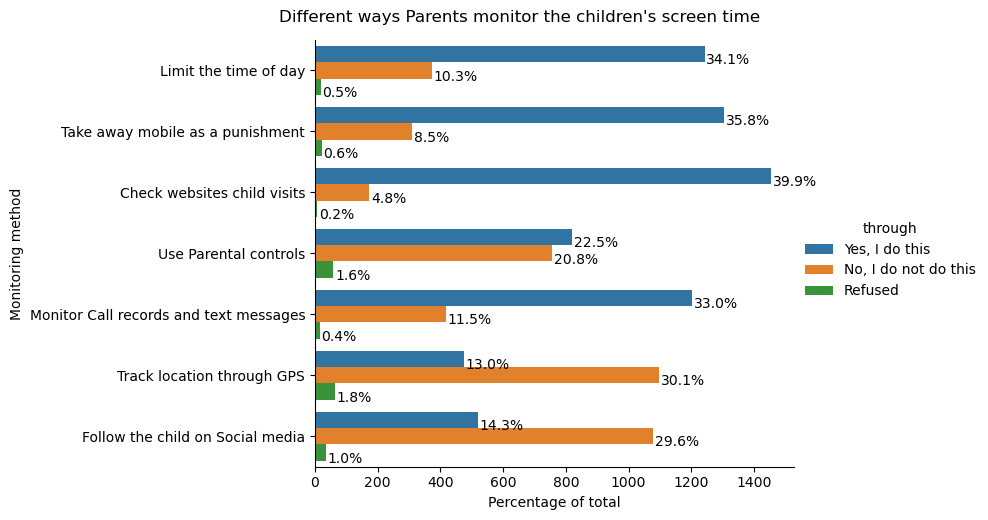

In [262]:
g5=sns.catplot(y='monitor_child_activities',hue='through',data=dfm3,kind='count',aspect=1.5)
g5.fig.suptitle("Different ways Parents monitor the children's screen time",y=1.03)
g5.set(yticklabels=['Limit the time of day','Take away mobile as a punishment','Check websites child visits','Use Parental controls','Monitor Call records and text messages','Track location through GPS','Follow the child on Social media'],xlabel='Percentage of total',ylabel='Monitoring method')
add_percentage_labels_for_accept_smartphone(g5,'monitor_child_activities',plt.gca(),len(data))

In [17]:
pd.pivot_table(index=['P_race','How_often_distracted'],columns='P_education_level',values='P_age_categories',aggfunc='count',data=data,fill_value=0)

P_education_level                        Associate's degree  \
P_race             How_often_distracted                       
Black non-Hispanic Never                                  4   
                   Often                                  6   
                   Rarely                                10   
                   Refused                                1   
                   Sometimes                             13   
Hispanic           Never                                  3   
                   Often                                 25   
                   Rarely                                29   
                   Refused                                0   
                   Sometimes                             55   
Other              Never                                  1   
                   Often                                  3   
                   Rarely                                 5   
                   Refused                                0   
                   Sometimes                              4   
Refused            Never                                  1   
                   Often                                  0   
                   Rarely                                 0   
                   Sometimes                              1   
White non-Hispanic Never                                 13   
                   Often                                 34   
                   Rarely                                48   
                   Refused                                1   
                   Sometimes                            113   

P_education_level                        College graduate/some post grad  \
P_race             How_often_distracted                                    
Black non-Hispanic Never                                               6   
                   Often                                              23   
                   Rarely                                             20   
                   Refused                                             1   
                   Sometimes                                          29   
Hispanic           Never                                               6   
                   Often                                              43   
                   Rarely                                             48   
                   Refused                                             1   
                   Sometimes                                         121   
Other              Never                                               4   
                   Often                                              22   
                   Rarely                                             12   
                   Refused                                             0   
                   Sometimes                                          40   
Refused            Never                                               3   
                   Often                                               1   
                   Rarely                                              0   
                   Sometimes                                           6   
White non-Hispanic Never                                              22   
                   Often                                             123   
                   Rarely                                            132   
                   Refused                                             1   
                   Sometimes                                         373   

P_education_level                        High school graduate  \
P_race             How_often_distracted                         
Black non-Hispanic Never                                    3   
                   Often                                    3   
                   Rarely                                  16   
                   Refused                                 

dfm4=data[['P_race','P_education_level','How_often_distracted']].melt(var_name='Distraction',value_name='How_often')

[Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Refused')]

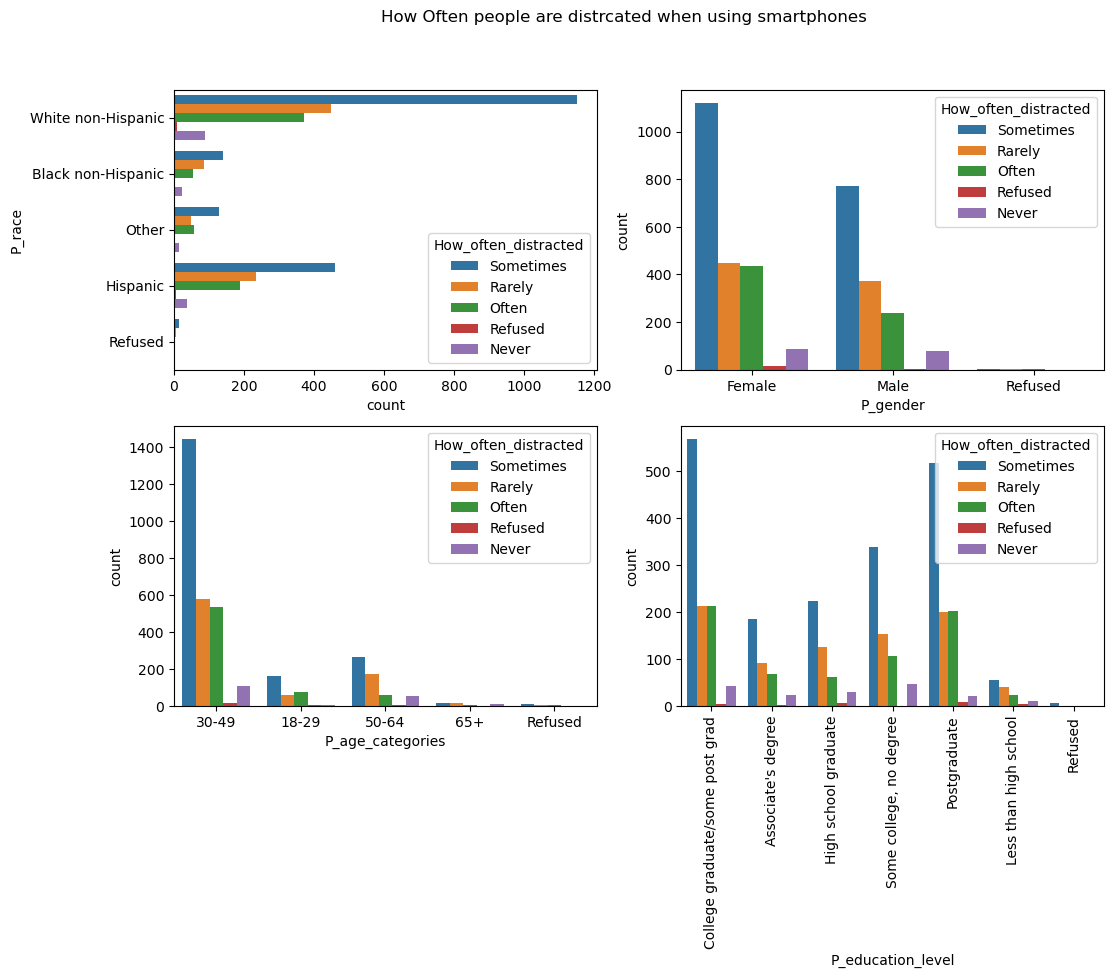

In [18]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
sns.countplot(ax=ax[0,0],data=data,y='P_race',hue='How_often_distracted')
ax[0,0].set_yticklabels(labels=data['P_race'].unique().tolist())
sns.countplot(ax=ax[1,1],data=data,x='P_education_level',hue='How_often_distracted')
ax[1,1].set_xticklabels(labels=data['P_education_level'].unique().tolist(),rotation=90)
fig.suptitle('How Often people are distrcated when using smartphones')
sns.countplot(ax=ax[1,0],data=data,x='P_age_categories',hue='How_often_distracted')
ax[1,0].set_xticklabels(labels=data['P_age_categories'].unique().tolist())
sns.countplot(ax=ax[0,1],data=data,x='P_gender',hue='How_often_distracted')
ax[0,1].set_xticklabels(labels=data['P_gender'].unique().tolist())


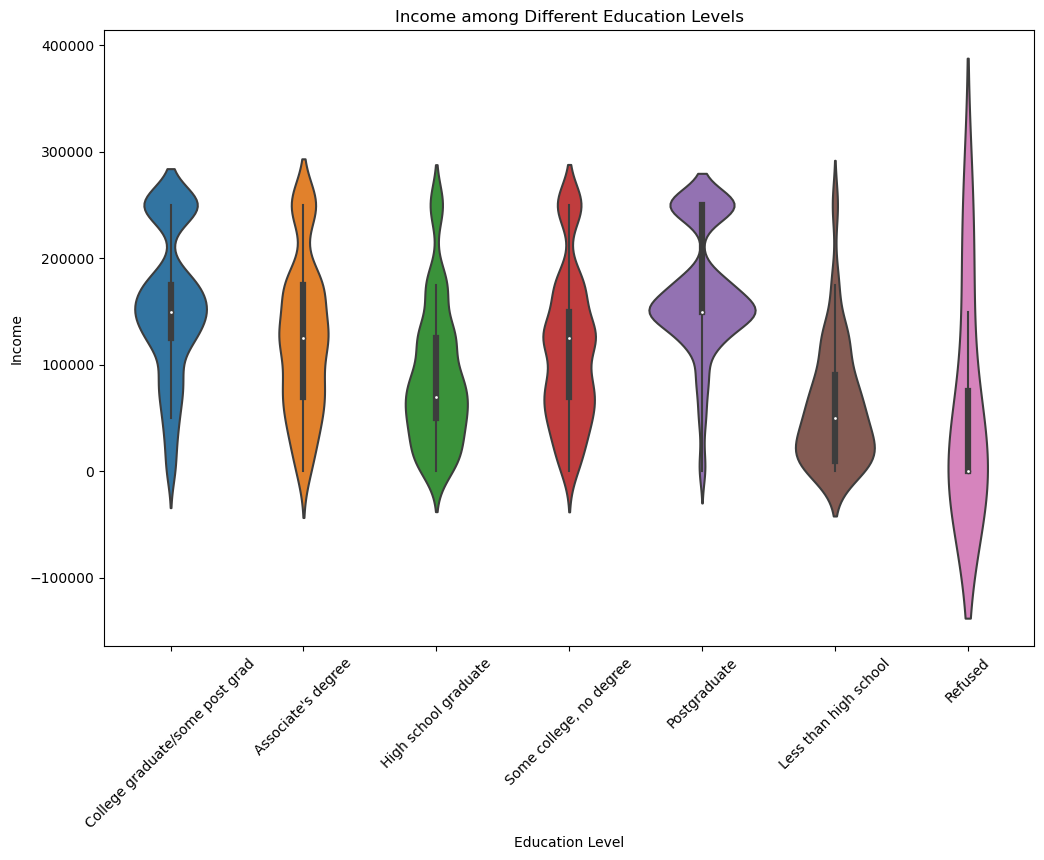

In [19]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='P_education_level', y='P_income', data=data)
plt.xticks(rotation=45)
plt.title('Income among Different Education Levels')
plt.ylabel('Income')
plt.xlabel('Education Level')
plt.show()

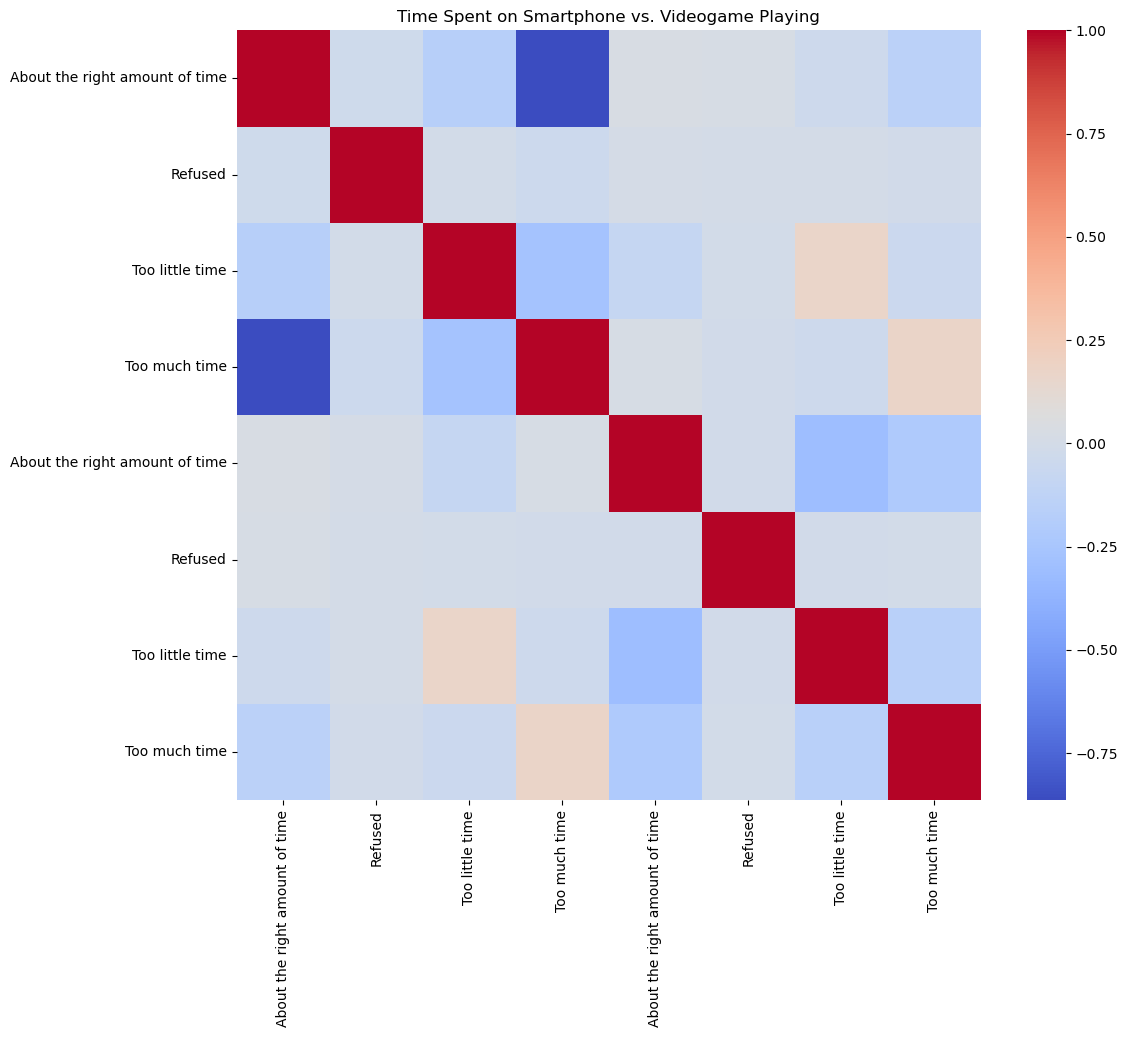

In [20]:
time_smartphone = pd.get_dummies(data['TS_on_smartphone'])
time_videogames = pd.get_dummies(data['TS_on_videogames'])
heatmap_data = pd.concat([time_smartphone, time_videogames], axis=1)
corr_heatmap = heatmap_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_heatmap, annot=False, cmap='coolwarm')
plt.title('Time Spent on Smartphone vs. Videogame Playing')
plt.show()

sns.stripplot(data=data,y='Child_owns_smartphone_age',size='P_income',x='Child_first_age_smartphone',hue='P_income',order=['0-2','3-4','5-8','9-11']) #,errorbar=None for lineplot ,order=['0-2','3-4','5-8','9-11'] size='P_income', hue='P_income'

C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


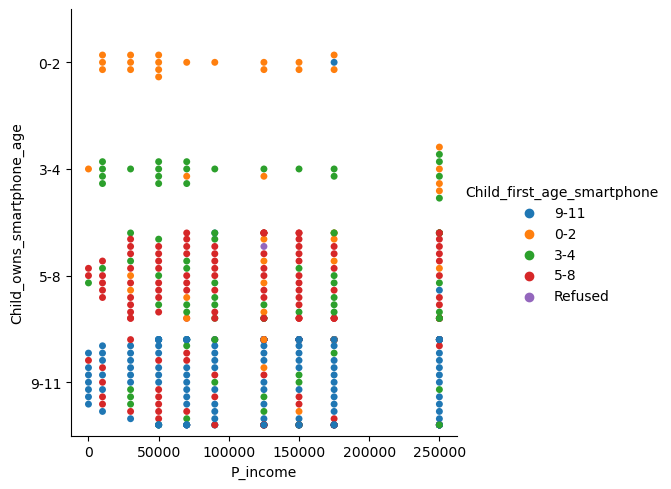

In [66]:
sns.catplot(kind='swarm',data=data,y='Child_owns_smartphone_age',x='P_income',order=['0-2','3-4','5-8','9-11'],hue='Child_first_age_smartphone') #,errorbar=None for lineplot

C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.3% of the points

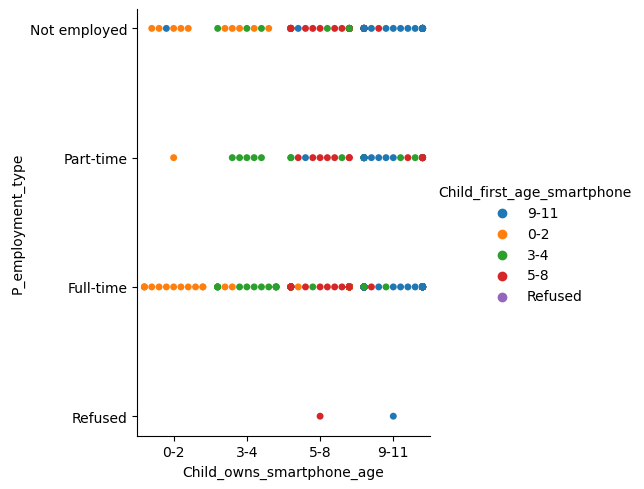

In [69]:
sns.catplot(kind='swarm',data=data,x='Child_owns_smartphone_age',y='P_employment_type',order=['0-2','3-4','5-8','9-11'],hue='Child_first_age_smartphone') #,errorbar=None for lineplot

C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.0% of the points

C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pspra\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


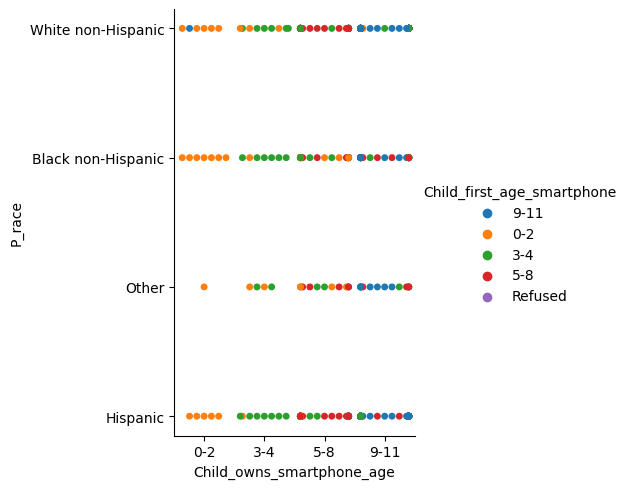

In [70]:
sns.catplot(kind='swarm',data=data,x='Child_owns_smartphone_age',y='P_race',order=['0-2','3-4','5-8','9-11'],hue='Child_first_age_smartphone') #,errorbar=None for lineplot

In [104]:
dfm4=data[['MNT_websites','MNT_take_away_mobile','MNT_screentime','MNT_call_records','MNT_parental_controls','MNT_socialmedia','MNT_gps','P_race']].melt(var_name='monitor_child_activities',value_name='response',id_vars='P_race')

In [115]:
dfm4.groupby(['P_race','response'])['monitor_child_activities'].count()

P_race              response            
Black non-Hispanic  No, I do not do this     379
                    Refused                    7
                    Yes, I do this           727
Hispanic            No, I do not do this     919
                    Refused                   63
                    Yes, I do this          1986
Other               No, I do not do this     358
                    Refused                    9
                    Yes, I do this           459
Refused             No, I do not do this      30
                    Refused                   11
                    Yes, I do this            57
White non-Hispanic  No, I do not do this    2522
                    Refused                  134
                    Yes, I do this          3791
Name: monitor_child_activities, dtype: int64

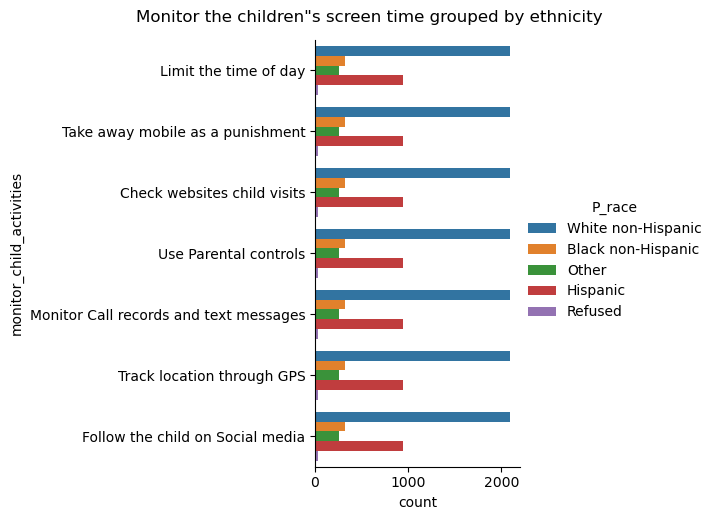

In [109]:
g6=sns.catplot(y='monitor_child_activities',hue='P_race',data=dfm4,kind='count')
g6.fig.suptitle('Monitor the children"s screen time grouped by ethnicity',y=1.03)
g6.set_yticklabels(labels=['Limit the time of day','Take away mobile as a punishment','Check websites child visits','Use Parental controls','Monitor Call records and text messages','Track location through GPS','Follow the child on Social media'])

In [110]:
dfm5=data[['MNT_websites','MNT_take_away_mobile','MNT_screentime','MNT_call_records','MNT_parental_controls','MNT_socialmedia','MNT_gps','P_employment_type']].melt(var_name='monitor_child_activities',value_name='response',id_vars='P_employment_type')

In [117]:
dfm5.groupby(['P_employment_type','response'])['monitor_child_activities'].count()

P_employment_type  response            
Full-time          No, I do not do this    2938
                   Refused                  126
                   Yes, I do this          4664
Not employed       No, I do not do this     679
                   Refused                   72
                   Yes, I do this          1426
Part-time          No, I do not do this     572
                   Refused                   22
                   Yes, I do this           904
Refused            No, I do not do this      19
                   Refused                    4
                   Yes, I do this            26
Name: monitor_child_activities, dtype: int64

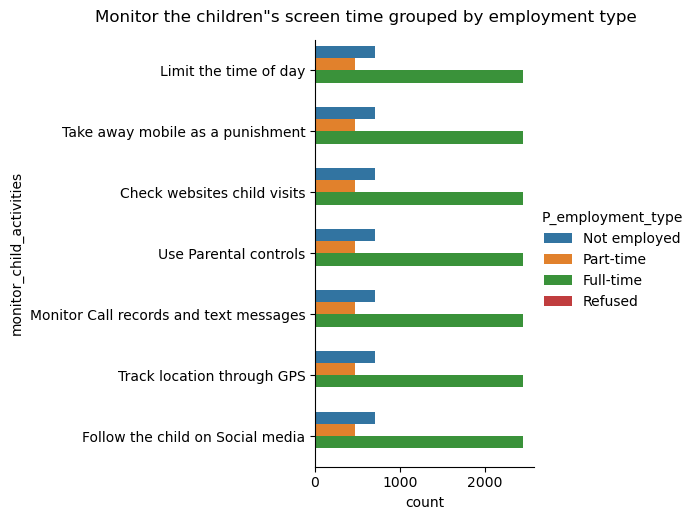

In [124]:
g7=sns.catplot(y='monitor_child_activities',hue='P_employment_type',data=dfm5,kind='count')
g7.fig.suptitle('Monitor the children"s screen time grouped by employment type',y=1.03)
g7.set_yticklabels(labels=['Limit the time of day','Take away mobile as a punishment','Check websites child visits','Use Parental controls','Monitor Call records and text messages','Track location through GPS','Follow the child on Social media'])